# Importing modules and setting parameters 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) 
sns.set('talk', rc={'figure.figsize': (12, 8)})

# Database loading

In [2]:
df = pd.read_csv('data/WorldCupMatches.csv') 

## First analysis 

In [3]:
df.shape

(4572, 20)

In [4]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [5]:
df.sample(4)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [7]:
## suppression of superfluous variables
df.drop(['Home Team Initials', 'Away Team Initials', 'MatchID', 'RoundID', 'Assistant 2', 'Assistant 1', 'Win conditions','Stage'], axis = 1, inplace = True) 

In [8]:
# to datetime 
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month'] = df['Datetime'].dt.month
df['game time'] = df['Datetime'].dt.hour
df.drop(['Datetime'], axis = 1, inplace = True) 

In [9]:
# let's keep the nationality of the arbitrator only 
def arb_func(val):
    if val is np.nan:    
        return np.nan
    else:    
        Referee1 = val.split('(')[1]
        referee_nationality = Referee1[:3] 
    return referee_nationality
        
df['Referee nationality'] = df['Referee'].map(arb_func)
df.drop(['Referee'], axis = 1, inplace = True) 

In [10]:
# delete the uninformed matches 
df.dropna(subset=['Home Team Name','Away Team Name' ], inplace=True)

In [11]:
# replacing missing values 
df.isna().sum()
df['Attendance'] = df['Attendance'].fillna(df['Attendance'].mean())

In [12]:
categorical_variable  = dict(df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64'])

for elem in categorical_variable .keys() : 
    df[elem] = df[elem].astype('category')

# We can now start the EDA

In [13]:
# continuous variables
df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,Month,game time
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,6.144366,16.836854
std,22.448825,1.610255,1.087573,23457.635776,0.937414,0.691252,0.421573,2.691398
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,5.000000,11.000000
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,6.000000,15.000000
50%,1990.000000,2.000000,1.000000,41788.000000,0.000000,0.000000,6.000000,17.000000
75%,2002.000000,3.000000,2.000000,61361.500000,1.000000,1.000000,6.000000,19.000000
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,7.000000,22.000000


- The majority of the games take place at 5pm, between the months of May and July 
- Attendance is heterogeneous, with an average of 45164.8 supporters  
- The Home Team Goals scores more goals than the Away Team Goals 
- The majority of the goals are scored in the second period  

In [14]:
# categorial variables 
df.describe(exclude = (['float64', 'int64']))

,Stadium,City,Home Team Name,Away Team Name,Referee nationality
count,852,852,852,852,852
unique,181,151,78,83,83
top,Estadio Azteca,Mexico City,Brazil,Mexico,ITA
freq,19,23,82,38,52


- Most of the world cup games were played in Estadio Azteca, in Mexico City	
- Brazil is the country that has played the most games as a Home Team 
- Mexico is the country that has played the most games as Away Team
- The majority of the referees are Italian 

<AxesSubplot:>

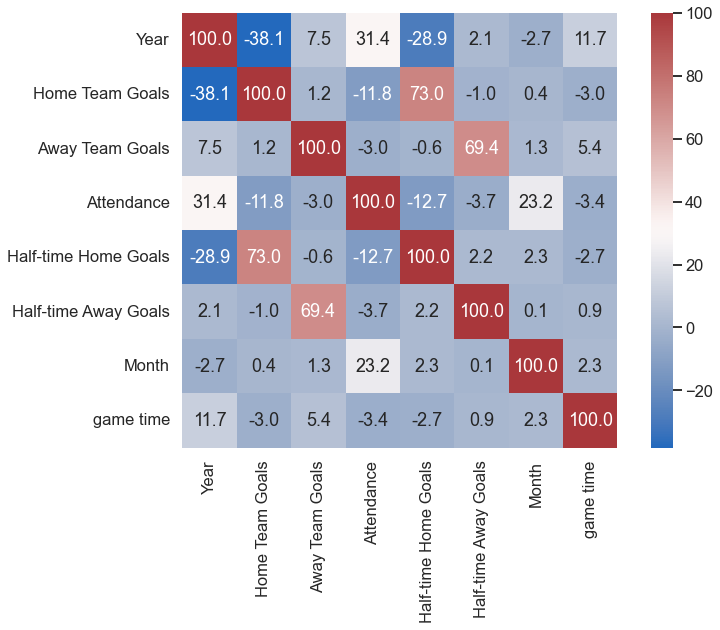

In [15]:
#correlation matrix 
sns.heatmap(
    100*df.corr(), 
    square=True, 
    annot=True, 
    fmt='.1f', 
    cmap=sns.cm.vlag )

- the more the years go by, the more Home Team Goals decreases
- the more the years go by, the more attendance increase 

C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Attendance'>

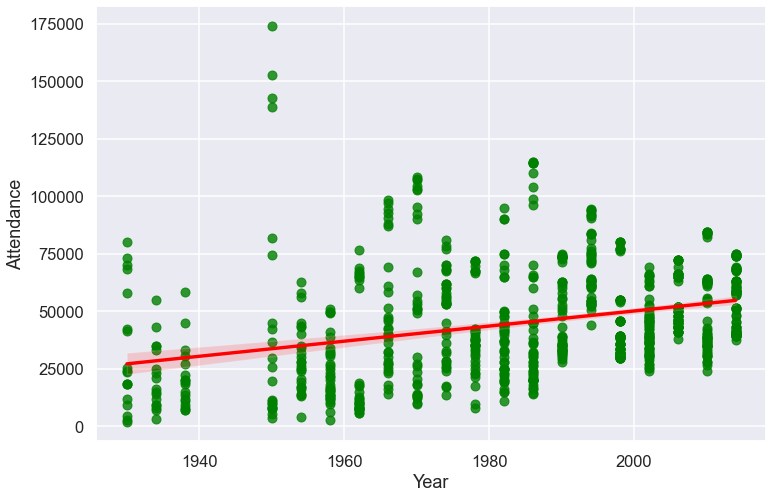

In [16]:
sns.regplot(
    df['Year'], df['Attendance'] , 
    scatter_kws = {'color': 'green'}, line_kws = {'color': 'red'} )

C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Home Team Goals'>

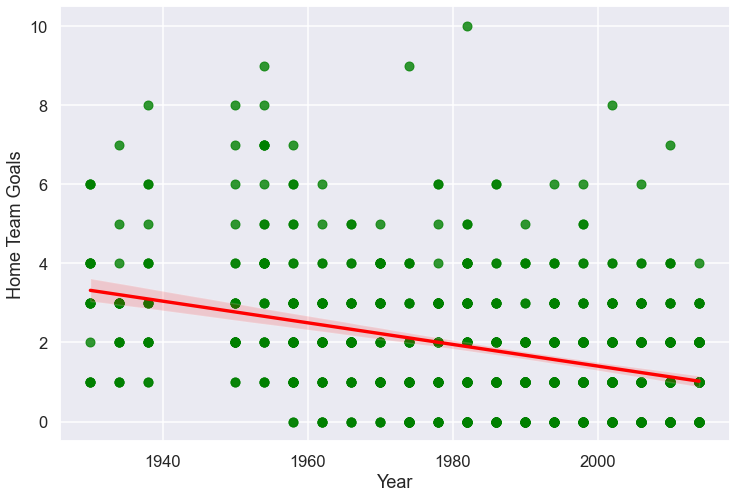

In [17]:
sns.regplot(
    df['Year'], df['Home Team Goals'] , 
    scatter_kws = {'color': 'green'}, line_kws = {'color': 'red'} )

In [18]:
# let's take an interest in the games of the french team 
df_France = df['Home Team Name'] == 'France'
df_filtered = df[df_France]
df_filtered

,Year,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Month,game time,Referee nationality
0,1930.0,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,3.0,0.0,7.0,15.0,URU
37,1938.0,Stade Olympique,Colombes,France,3.0,1.0,Belgium,30454.0,2.0,1.0,6.0,17.0,SUI
85,1954.0,Charmilles,Geneva,France,3.0,2.0,Mexico,19000.0,1.0,0.0,6.0,17.0,ESP
105,1958.0,Idrottsparken,Norrk�Ping,France,7.0,3.0,Paraguay,16518.0,2.0,2.0,6.0,19.0,ESP
122,1958.0,Eyravallen,Orebro,France,2.0,1.0,Scotland,13554.0,2.0,0.0,6.0,19.0,ARG
131,1958.0,Idrottsparken,Norrk�Ping,France,4.0,0.0,Northern Ireland,11800.0,1.0,0.0,6.0,19.0,ESP
134,1958.0,Nya Ullevi,Gothenburg,France,6.0,3.0,Germany FR,32483.0,3.0,1.0,6.0,17.0,ARG
172,1966.0,Wembley Stadium,London,France,1.0,1.0,Mexico,69237.0,0.0,0.0,7.0,19.0,ISR
286,1978.0,Estadio Jos� Mar�a Minella,Mar Del Plata,France,3.0,1.0,Hungary,23127.0,3.0,1.0,6.0,15.0,BRA
330,1982.0,Jose Zorrilla,Valladolid,France,4.0,1.0,Kuwait,30043.0,2.0,0.0,6.0,17.0,URS


In [19]:
df_filtered.describe(exclude = (['float64', 'int64']))

,Stadium,City,Home Team Name,Away Team Name,Referee nationality
count,31,31,31,31,31
unique,26,26,1,21,16
top,Estadio do Maracana,Valladolid,France,Mexico,ESP
freq,2,2,31,4,4



The French team played most of its games in Spain, with a majority of the referees being Spanish. Mexico is the country most faced by France 

In [20]:
df_filtered.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,Month,game time
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1987.032258,2.193548,1.000000,41870.677419,0.806452,0.387097,6.161290,16.838710
std,23.932522,1.851474,0.856349,21106.414217,1.013882,0.615219,0.454369,2.933675
min,1930.000000,0.000000,0.000000,4444.000000,0.000000,0.000000,5.000000,12.000000
25%,1972.000000,1.000000,0.000000,29021.500000,0.000000,0.000000,6.000000,15.000000
50%,1998.000000,2.000000,1.000000,38289.000000,0.000000,0.000000,6.000000,17.000000
75%,2006.000000,3.500000,1.000000,58780.500000,1.000000,1.000000,6.000000,19.000000
max,2014.000000,7.000000,3.000000,80000.000000,3.000000,2.000000,7.000000,21.000000


On average, the French team scores more goals than it concedes, with an average attendance of  41870 


<AxesSubplot:>

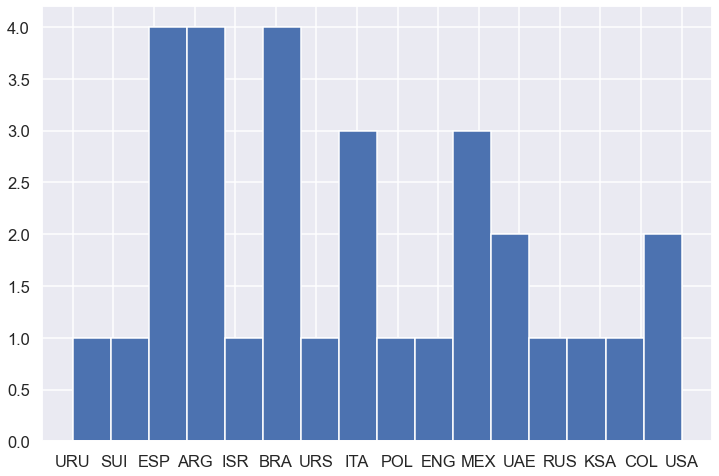

In [21]:
# let's take a look at the referees and the games of the french team 
df_filtered['Referee nationality'].hist(bins=16)

In [22]:
df_regroupement = df_filtered.pivot_table(
    values=['Home Team Goals', 'Away Team Goals'],
    index=['Referee nationality'], 
    aggfunc='median')
df_regroupement.sort_values(by = ['Away Team Goals'])

,Away Team Goals,Home Team Goals
Referee nationality,,
MEX,0.0,1.0
RUS,0.0,0.0
USA,0.0,2.0
BRA,0.5,3.0
UAE,0.5,0.5
ARG,1.0,1.0
ISR,1.0,1.0
ITA,1.0,1.0
POL,1.0,4.0


We notice that the colombian and english referees do not succeed too much for the french team in world cup 